# Using Census Data to Predict Housing Market Trends

## Data Wrangling

### Table of Contents

## 1. Introduction

Investing in the housing market can be a great way to boost retirement income or produce passive income for a savvy investor. However, there is quite a lot of risk involved, and mitigating risk requires large amounts of research and keeping up to date on neighborhood sales prices, market trends and more. Market knowledge is key for flipping houses in order to ensure the neighborhood where the house is being flipped can reach a profitable value if renovated and improved. 

In this project, I plan to explore the wealth of data included in the US Census in order to ascertain whether one can accurately predict, based on tract level demographic data, areas which will see the highest increase in home value. I plan to focus mainly on North Carolina, and large cities within the state, however, the hope is that the model will be viable for any state or geographical area in the country. Given the tools from this project, a large portion of the intensive research required for a real estate investor to learn about areas they may have no knowledge of can be performed using machine learning. 

## 2. Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Data Loading

Here, CSV files are loaded containing data from the 5 largest cities in NC. This data was collected from the US Census data using R and the tidycensus package. 

In [3]:
nc_19 = pd.read_csv('C:/Users/Brady Pearce/Documents/Springboard/df_19.csv')
nc_18 = pd.read_csv('C:/Users/Brady Pearce/Documents/Springboard/df_18.csv')
nc_17 = pd.read_csv('C:/Users/Brady Pearce/Documents/Springboard/df_17.csv')
nc_16 = pd.read_csv('C:/Users/Brady Pearce/Documents/Springboard/df_16.csv')
nc_15 = pd.read_csv('C:/Users/Brady Pearce/Documents/Springboard/df_15.csv')
print(nc_19.head(), nc_18.head(), nc_17.head(), nc_16.head(), nc_15.head())


   Unnamed: 0        GEOID  tpop  pnhwhite19   pnhasn19   pnhblk19    phisp19  \
0           1  37183050300  3350   85.611940   2.238806   8.567164   1.671642   
1           2  37067002701  6700   26.626866   0.000000  41.985075  31.000000   
2           3  37119005518  5359   33.756298  15.525285  40.156746   8.154506   
3           4  37051003309  6546   41.964559   5.545371  31.622365  12.496181   
4           5  37183053723  3401   74.242870   3.910614   8.938548   9.761835   

   nhwhite  nhasn  nhblk  ...  tpopfml50to54  tpopfml55to59  tpopfml60to61  \
0     2868     75    287  ...             41             20             44   
1     1784      0   2813  ...            226            221             36   
2     1809    832   2152  ...            148            133             53   
3     2747    363   2070  ...            199            191             62   
4     2525    133    304  ...             91             76             93   

   tpopfml62to64  tpopfml65to66  tpopfml67to

In [4]:
nc_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     435 non-null    int64  
 1   GEOID          435 non-null    int64  
 2   tpop           435 non-null    int64  
 3   pnhwhite19     430 non-null    float64
 4   pnhasn19       430 non-null    float64
 5   pnhblk19       430 non-null    float64
 6   phisp19        430 non-null    float64
 7   nhwhite        435 non-null    int64  
 8   nhasn          435 non-null    int64  
 9   nhblk          435 non-null    int64  
 10  hisp           435 non-null    int64  
 11  medinc19       425 non-null    float64
 12  rent19         422 non-null    float64
 13  houseval19     418 non-null    float64
 14  pcol19         430 non-null    float64
 15  tpop2          435 non-null    int64  
 16  tpopml         435 non-null    int64  
 17  tpopmlt5       435 non-null    int64  
 18  tpopml5to9

In [5]:
missing = pd.concat([nc_19.isnull().sum(), 100 * nc_19.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Unnamed: 0,0,0.000000
tpopml65to66,0,0.000000
tpopml67to69,0,0.000000
tpopml70to74,0,0.000000
tpopml75to79,0,0.000000
...,...,...
pnhasn19,5,1.149425
pnhwhite19,5,1.149425
medinc19,10,2.298851
rent19,13,2.988506


Unfortunately, it looks like there are 17 missing values for house values in the 2019 data. We will have to ignore these, since this is our target value. 

In [6]:
nc_19.columns

Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite19', 'pnhasn19', 'pnhblk19',
       'phisp19', 'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc19', 'rent19',
       'houseval19', 'pcol19', 'tpop2', 'tpopml', 'tpopmlt5', 'tpopml5to9',
       'tpopml10to14', 'tpopml15to17', 'tpopml18to19', 'tpopml20', 'tpopml21',
       'tpopml22to24', 'tpopml25to29', 'tpopml30to34', 'tpopml35to39',
       'tpopml40to44', 'tpopml45to49', 'tpopml50to54', 'tpopml55to59',
       'tpopml60to61', 'tpopml62to64', 'tpopml65to66', 'tpopml67to69',
       'tpopml70to74', 'tpopml75to79', 'tpopml80to85', 'tpopmlgt85', 'tpopfml',
       'tpopfmlt5', 'tpopfml5to9', 'tpopfml10to14', 'tpopfml15to17',
       'tpopfml18to19', 'tpopfml20', 'tpopfml21', 'tpopfml22to24',
       'tpopfml25to29', 'tpopfml30to34', 'tpopfml35to39', 'tpopfml40to44',
       'tpopfml45to49', 'tpopfml50to54', 'tpopfml55to59', 'tpopfml60to61',
       'tpopfml62to64', 'tpopfml65to66', 'tpopfml67to69', 'tpopfml70to74',
       'tpopfml75to79', 'tpopfml80to85

The column names refer to various population demographic details. The GEOID column refers to the specific census tract of interest. pnhwhite, pnhasn, pnhblk, pnhisp all refer to racial demographics, pcol refers to the percentage of the population with college degrees, medinc refers to the median income and rent refers to the value of rent in the tract. The tpopml and tpopfml and their related columns refers to the total population that is male or female and of specific age ranges. The following work will be done to give more specific names to these columns and to calculate percentage values. 

In [7]:
nc_19['Percent of Total Population Male'] = nc_19['tpopml']/nc_19['tpop2']
nc_19['Percent of Male Population Under 10'] = (nc_19['tpopmlt5']+nc_19['tpopml5to9'])/nc_19['tpopml']
nc_19['Percent of Male Population 10 to 14'] = (nc_19['tpopml10to14']+nc_19['tpopml15to17'])/nc_19['tpopml']
nc_19['Percent of Male Population 18 to 21'] = (nc_19['tpopml18to19']+nc_19['tpopml20']+nc_19['tpopml21'])/nc_19['tpopml']
nc_19['Percent of Male Population 22 to 29'] = (nc_19['tpopml22to24'] + nc_19['tpopml25to29'])/nc_19['tpopml']
nc_19['Percent of Male Population 30 to 39'] = (nc_19['tpopml30to34']+nc_19['tpopml35to39'])/nc_19['tpopml']
nc_19['Percent of Male Population 40 to 54'] = (nc_19['tpopml50to54']+nc_19['tpopml45to49']+nc_19['tpopml40to44'])/nc_19['tpopml']
nc_19['Percent of Male Population 55 to 64'] = (nc_19['tpopml60to61']+nc_19['tpopml62to64']+nc_19['tpopml55to59'])/nc_19['tpopml']
nc_19['Percent of Male Population 65 to 74'] = (nc_19['tpopml67to69']+nc_19['tpopml70to74']+nc_19['tpopml65to66'])/nc_19['tpopml']
nc_19['Percent of Male Population 75 to 85'] = (nc_19['tpopml80to85']+nc_19['tpopml75to79'])/nc_19['tpopml']
nc_19['Percent of Male Population Over 85'] = nc_19['tpopmlgt85']/nc_19['tpopml']


In [8]:
nc_19['Percent of Total Population Female'] = nc_19['tpopfml']/nc_19['tpop2']
nc_19['Percent of Female Population Under 10'] = (nc_19['tpopfmlt5']+nc_19['tpopfml5to9'])/nc_19['tpopfml']
nc_19['Percent of Female Population 10 to 14'] = (nc_19['tpopfml10to14']+nc_19['tpopfml15to17'])/nc_19['tpopfml']
nc_19['Percent of Female Population 18 to 21'] = (nc_19['tpopfml18to19']+nc_19['tpopfml20']+nc_19['tpopfml21'])/nc_19['tpopfml']
nc_19['Percent of Female Population 22 to 29'] = (nc_19['tpopfml22to24'] + nc_19['tpopfml25to29'])/nc_19['tpopfml']
nc_19['Percent of Female Population 30 to 39'] = (nc_19['tpopfml30to34']+nc_19['tpopfml35to39'])/nc_19['tpopfml']
nc_19['Percent of Female Population 40 to 54'] = (nc_19['tpopfml50to54']+nc_19['tpopfml45to49']+nc_19['tpopfml40to44'])/nc_19['tpopfml']
nc_19['Percent of Female Population 55 to 64'] = (nc_19['tpopfml60to61']+nc_19['tpopfml62to64']+nc_19['tpopfml55to59'])/nc_19['tpopfml']
nc_19['Percent of Female Population 65 to 74'] = (nc_19['tpopfml67to69']+nc_19['tpopfml70to74']+nc_19['tpopfml65to66'])/nc_19['tpopfml']
nc_19['Percent of Female Population 75 to 85'] = (nc_19['tpopfml80to85']+nc_19['tpopfml75to79'])/nc_19['tpopfml']
nc_19['Percent of Female Population Over 85'] = nc_19['tpopfmlgt85']/nc_19['tpopfml']
nc_19['Year'] = 2019

In [9]:
nc_18['Percent of Total Population Male'] = nc_18['tpopml']/nc_18['tpop2']
nc_18['Percent of Male Population Under 10'] = (nc_18['tpopmlt5']+nc_18['tpopml5to9'])/nc_18['tpopml']
nc_18['Percent of Male Population 10 to 14'] = (nc_18['tpopml10to14']+nc_18['tpopml15to17'])/nc_18['tpopml']
nc_18['Percent of Male Population 18 to 21'] = (nc_18['tpopml18to19']+nc_18['tpopml20']+nc_18['tpopml21'])/nc_18['tpopml']
nc_18['Percent of Male Population 22 to 29'] = (nc_18['tpopml22to24'] + nc_18['tpopml25to29'])/nc_18['tpopml']
nc_18['Percent of Male Population 30 to 39'] = (nc_18['tpopml30to34']+nc_18['tpopml35to39'])/nc_18['tpopml']
nc_18['Percent of Male Population 40 to 54'] = (nc_18['tpopml50to54']+nc_18['tpopml45to49']+nc_18['tpopml40to44'])/nc_18['tpopml']
nc_18['Percent of Male Population 55 to 64'] = (nc_18['tpopml60to61']+nc_18['tpopml62to64']+nc_18['tpopml55to59'])/nc_18['tpopml']
nc_18['Percent of Male Population 65 to 74'] = (nc_18['tpopml67to69']+nc_18['tpopml70to74']+nc_18['tpopml65to66'])/nc_18['tpopml']
nc_18['Percent of Male Population 75 to 85'] = (nc_18['tpopml80to85']+nc_18['tpopml75to79'])/nc_18['tpopml']
nc_18['Percent of Male Population Over 85'] = nc_18['tpopmlgt85']/nc_18['tpopml']


In [10]:
nc_18['Percent of Total Population Female'] = nc_18['tpopfml']/nc_18['tpop2']
nc_18['Percent of Female Population Under 10'] = (nc_18['tpopfmlt5']+nc_18['tpopfml5to9'])/nc_18['tpopfml']
nc_18['Percent of Female Population 10 to 14'] = (nc_18['tpopfml10to14']+nc_18['tpopfml15to17'])/nc_18['tpopfml']
nc_18['Percent of Female Population 18 to 21'] = (nc_18['tpopfml18to19']+nc_18['tpopfml20']+nc_18['tpopfml21'])/nc_18['tpopfml']
nc_18['Percent of Female Population 22 to 29'] = (nc_18['tpopfml22to24'] + nc_18['tpopfml25to29'])/nc_18['tpopfml']
nc_18['Percent of Female Population 30 to 39'] = (nc_18['tpopfml30to34']+nc_18['tpopfml35to39'])/nc_18['tpopfml']
nc_18['Percent of Female Population 40 to 54'] = (nc_18['tpopfml50to54']+nc_18['tpopfml45to49']+nc_18['tpopfml40to44'])/nc_18['tpopfml']
nc_18['Percent of Female Population 55 to 64'] = (nc_18['tpopfml60to61']+nc_18['tpopfml62to64']+nc_18['tpopfml55to59'])/nc_18['tpopfml']
nc_18['Percent of Female Population 65 to 74'] = (nc_18['tpopfml67to69']+nc_18['tpopfml70to74']+nc_18['tpopfml65to66'])/nc_18['tpopfml']
nc_18['Percent of Female Population 75 to 85'] = (nc_18['tpopfml80to85']+nc_18['tpopfml75to79'])/nc_18['tpopfml']
nc_18['Percent of Female Population Over 85'] = nc_18['tpopfmlgt85']/nc_18['tpopfml']
nc_18['Year'] = 2018

In [11]:
nc_17['Percent of Total Population Male'] = nc_17['tpopml']/nc_17['tpop2']
nc_17['Percent of Male Population Under 10'] = (nc_17['tpopmlt5']+nc_17['tpopml5to9'])/nc_17['tpopml']
nc_17['Percent of Male Population 10 to 14'] = (nc_17['tpopml10to14']+nc_17['tpopml15to17'])/nc_17['tpopml']
nc_17['Percent of Male Population 18 to 21'] = (nc_17['tpopml18to19']+nc_17['tpopml20']+nc_17['tpopml21'])/nc_17['tpopml']
nc_17['Percent of Male Population 22 to 29'] = (nc_17['tpopml22to24'] + nc_17['tpopml25to29'])/nc_17['tpopml']
nc_17['Percent of Male Population 30 to 39'] = (nc_17['tpopml30to34']+nc_17['tpopml35to39'])/nc_17['tpopml']
nc_17['Percent of Male Population 40 to 54'] = (nc_17['tpopml50to54']+nc_17['tpopml45to49']+nc_17['tpopml40to44'])/nc_17['tpopml']
nc_17['Percent of Male Population 55 to 64'] = (nc_17['tpopml60to61']+nc_17['tpopml62to64']+nc_17['tpopml55to59'])/nc_17['tpopml']
nc_17['Percent of Male Population 65 to 74'] = (nc_17['tpopml67to69']+nc_17['tpopml70to74']+nc_17['tpopml65to66'])/nc_17['tpopml']
nc_17['Percent of Male Population 75 to 85'] = (nc_17['tpopml80to85']+nc_17['tpopml75to79'])/nc_17['tpopml']
nc_17['Percent of Male Population Over 85'] = nc_17['tpopmlgt85']/nc_17['tpopml']


In [12]:
nc_17['Percent of Total Population Female'] = nc_17['tpopfml']/nc_17['tpop2']
nc_17['Percent of Female Population Under 10'] = (nc_17['tpopfmlt5']+nc_17['tpopfml5to9'])/nc_17['tpopfml']
nc_17['Percent of Female Population 10 to 14'] = (nc_17['tpopfml10to14']+nc_17['tpopfml15to17'])/nc_17['tpopfml']
nc_17['Percent of Female Population 18 to 21'] = (nc_17['tpopfml18to19']+nc_17['tpopfml20']+nc_17['tpopfml21'])/nc_17['tpopfml']
nc_17['Percent of Female Population 22 to 29'] = (nc_17['tpopfml22to24'] + nc_17['tpopfml25to29'])/nc_17['tpopfml']
nc_17['Percent of Female Population 30 to 39'] = (nc_17['tpopfml30to34']+nc_17['tpopfml35to39'])/nc_17['tpopfml']
nc_17['Percent of Female Population 40 to 54'] = (nc_17['tpopfml50to54']+nc_17['tpopfml45to49']+nc_17['tpopfml40to44'])/nc_17['tpopfml']
nc_17['Percent of Female Population 55 to 64'] = (nc_17['tpopfml60to61']+nc_17['tpopfml62to64']+nc_17['tpopfml55to59'])/nc_17['tpopfml']
nc_17['Percent of Female Population 65 to 74'] = (nc_17['tpopfml67to69']+nc_17['tpopfml70to74']+nc_17['tpopfml65to66'])/nc_17['tpopfml']
nc_17['Percent of Female Population 75 to 85'] = (nc_17['tpopfml80to85']+nc_17['tpopfml75to79'])/nc_17['tpopfml']
nc_17['Percent of Female Population Over 85'] = nc_17['tpopfmlgt85']/nc_17['tpopfml']
nc_17['Year'] = 2017

In [13]:
nc_16['Percent of Total Population Male'] = nc_16['tpopml']/nc_16['tpop2']
nc_16['Percent of Male Population Under 10'] = (nc_16['tpopmlt5']+nc_16['tpopml5to9'])/nc_16['tpopml']
nc_16['Percent of Male Population 10 to 14'] = (nc_16['tpopml10to14']+nc_16['tpopml15to17'])/nc_16['tpopml']
nc_16['Percent of Male Population 18 to 21'] = (nc_16['tpopml18to19']+nc_16['tpopml20']+nc_16['tpopml21'])/nc_16['tpopml']
nc_16['Percent of Male Population 22 to 29'] = (nc_16['tpopml22to24'] + nc_16['tpopml25to29'])/nc_16['tpopml']
nc_16['Percent of Male Population 30 to 39'] = (nc_16['tpopml30to34']+nc_16['tpopml35to39'])/nc_16['tpopml']
nc_16['Percent of Male Population 40 to 54'] = (nc_16['tpopml50to54']+nc_16['tpopml45to49']+nc_16['tpopml40to44'])/nc_16['tpopml']
nc_16['Percent of Male Population 55 to 64'] = (nc_16['tpopml60to61']+nc_16['tpopml62to64']+nc_16['tpopml55to59'])/nc_16['tpopml']
nc_16['Percent of Male Population 65 to 74'] = (nc_16['tpopml67to69']+nc_16['tpopml70to74']+nc_16['tpopml65to66'])/nc_16['tpopml']
nc_16['Percent of Male Population 75 to 85'] = (nc_16['tpopml80to85']+nc_16['tpopml75to79'])/nc_16['tpopml']
nc_16['Percent of Male Population Over 85'] = nc_16['tpopmlgt85']/nc_16['tpopml']


In [14]:
nc_16['Percent of Total Population Female'] = nc_16['tpopfml']/nc_16['tpop2']
nc_16['Percent of Female Population Under 10'] = (nc_16['tpopfmlt5']+nc_16['tpopfml5to9'])/nc_16['tpopfml']
nc_16['Percent of Female Population 10 to 14'] = (nc_16['tpopfml10to14']+nc_16['tpopfml15to17'])/nc_16['tpopfml']
nc_16['Percent of Female Population 18 to 21'] = (nc_16['tpopfml18to19']+nc_16['tpopfml20']+nc_16['tpopfml21'])/nc_16['tpopfml']
nc_16['Percent of Female Population 22 to 29'] = (nc_16['tpopfml22to24'] + nc_16['tpopfml25to29'])/nc_16['tpopfml']
nc_16['Percent of Female Population 30 to 39'] = (nc_16['tpopfml30to34']+nc_16['tpopfml35to39'])/nc_16['tpopfml']
nc_16['Percent of Female Population 40 to 54'] = (nc_16['tpopfml50to54']+nc_16['tpopfml45to49']+nc_16['tpopfml40to44'])/nc_16['tpopfml']
nc_16['Percent of Female Population 55 to 64'] = (nc_16['tpopfml60to61']+nc_16['tpopfml62to64']+nc_16['tpopfml55to59'])/nc_16['tpopfml']
nc_16['Percent of Female Population 65 to 74'] = (nc_16['tpopfml67to69']+nc_16['tpopfml70to74']+nc_16['tpopfml65to66'])/nc_16['tpopfml']
nc_16['Percent of Female Population 75 to 85'] = (nc_16['tpopfml80to85']+nc_16['tpopfml75to79'])/nc_16['tpopfml']
nc_16['Percent of Female Population Over 85'] = nc_16['tpopfmlgt85']/nc_16['tpopfml']
nc_16['Year'] = 2016

In [15]:
nc_15['Percent of Total Population Male'] = nc_15['tpopml']/nc_15['tpop2']
nc_15['Percent of Male Population Under 10'] = (nc_15['tpopmlt5']+nc_15['tpopml5to9'])/nc_15['tpopml']
nc_15['Percent of Male Population 10 to 14'] = (nc_15['tpopml10to14']+nc_15['tpopml15to17'])/nc_15['tpopml']
nc_15['Percent of Male Population 18 to 21'] = (nc_15['tpopml18to19']+nc_15['tpopml20']+nc_15['tpopml21'])/nc_15['tpopml']
nc_15['Percent of Male Population 22 to 29'] = (nc_15['tpopml22to24'] + nc_15['tpopml25to29'])/nc_15['tpopml']
nc_15['Percent of Male Population 30 to 39'] = (nc_15['tpopml30to34']+nc_15['tpopml35to39'])/nc_15['tpopml']
nc_15['Percent of Male Population 40 to 54'] = (nc_15['tpopml50to54']+nc_15['tpopml45to49']+nc_15['tpopml40to44'])/nc_15['tpopml']
nc_15['Percent of Male Population 55 to 64'] = (nc_15['tpopml60to61']+nc_15['tpopml62to64']+nc_15['tpopml55to59'])/nc_15['tpopml']
nc_15['Percent of Male Population 65 to 74'] = (nc_15['tpopml67to69']+nc_15['tpopml70to74']+nc_15['tpopml65to66'])/nc_15['tpopml']
nc_15['Percent of Male Population 75 to 85'] = (nc_15['tpopml80to85']+nc_15['tpopml75to79'])/nc_15['tpopml']
nc_15['Percent of Male Population Over 85'] = nc_15['tpopmlgt85']/nc_15['tpopml']

In [16]:
nc_15['Percent of Total Population Female'] = nc_15['tpopfml']/nc_15['tpop2']
nc_15['Percent of Female Population Under 10'] = (nc_15['tpopfmlt5']+nc_15['tpopfml5to9'])/nc_15['tpopfml']
nc_15['Percent of Female Population 10 to 14'] = (nc_15['tpopfml10to14']+nc_15['tpopfml15to17'])/nc_15['tpopfml']
nc_15['Percent of Female Population 18 to 21'] = (nc_15['tpopfml18to19']+nc_15['tpopfml20']+nc_15['tpopfml21'])/nc_15['tpopfml']
nc_15['Percent of Female Population 22 to 29'] = (nc_15['tpopfml22to24'] + nc_15['tpopfml25to29'])/nc_15['tpopfml']
nc_15['Percent of Female Population 30 to 39'] = (nc_15['tpopfml30to34']+nc_15['tpopfml35to39'])/nc_15['tpopfml']
nc_15['Percent of Female Population 40 to 54'] = (nc_15['tpopfml50to54']+nc_15['tpopfml45to49']+nc_15['tpopfml40to44'])/nc_15['tpopfml']
nc_15['Percent of Female Population 55 to 64'] = (nc_15['tpopfml60to61']+nc_15['tpopfml62to64']+nc_15['tpopfml55to59'])/nc_15['tpopfml']
nc_15['Percent of Female Population 65 to 74'] = (nc_15['tpopfml67to69']+nc_15['tpopfml70to74']+nc_15['tpopfml65to66'])/nc_15['tpopfml']
nc_15['Percent of Female Population 75 to 85'] = (nc_15['tpopfml80to85']+nc_15['tpopfml75to79'])/nc_15['tpopfml']
nc_15['Percent of Female Population Over 85'] = nc_15['tpopfmlgt85']/nc_15['tpopfml']
nc_15['Year'] = 2015

Now, we have dataframes for each of the years of interest and can take a look at how a couple of the values changed over time using a scatter plot. 

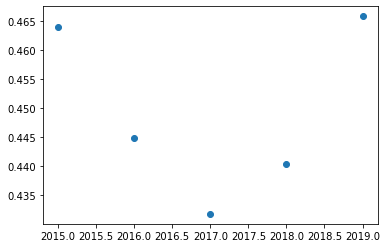

In [17]:
x = [nc_15[nc_15['GEOID'] == 37067002001]['Percent of Total Population Male'], nc_16[nc_16['GEOID'] == 37067002001]['Percent of Total Population Male'], nc_17[nc_17['GEOID'] == 37067002001]['Percent of Total Population Male'], nc_18[nc_18['GEOID'] == 37067002001]['Percent of Total Population Male'], nc_19[nc_19['GEOID'] == 37067002001]['Percent of Total Population Male']]
y = [2015, 2016, 2017, 2018, 2019]

plt.scatter(y, x)


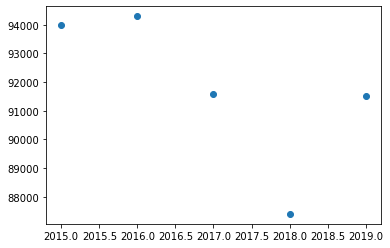

In [18]:
x = [nc_15[nc_15['GEOID'] == 37067002001]['houseval15'], nc_16[nc_16['GEOID'] == 37067002001]['houseval16'], nc_17[nc_17['GEOID'] == 37067002001]['houseval17'], nc_18[nc_18['GEOID'] == 37067002001]['houseval18'], nc_19[nc_19['GEOID'] == 37067002001]['houseval19']]
y = [2015, 2016, 2017, 2018, 2019]

plt.scatter(y, x)

You can see that there was a good amount of fluctuation in the median home price for this GEOID, and it would have been a particularly poor investment opportunity since the value was lower in 2019 than it was in 2015. 

In order to most efficiently work with this data, it would be useful to combine all of the year's dataframes. As is, that would not work out very well since the column values have some names that have specific year number in them (15, 16, 17..). The following work was done to make the column names the same for all dataframes and then join them all together in one. 

In [19]:
nc_19.rename(columns={'pnhwhite19':'pnhwhite', 'pnhasn19':'pnhasn', 'pnhblk19':'pnhblk', 'phisp19':'phisp', 'medinc19':'medinc', 'rent19':'rent', 
                     'houseval19':'houseval', 'pcol19':'pcol'}, inplace=True)
nc_19.columns


Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'tpopml', 'tpopmlt5', 'tpopml5to9', 'tpopml10to14',
       'tpopml15to17', 'tpopml18to19', 'tpopml20', 'tpopml21', 'tpopml22to24',
       'tpopml25to29', 'tpopml30to34', 'tpopml35to39', 'tpopml40to44',
       'tpopml45to49', 'tpopml50to54', 'tpopml55to59', 'tpopml60to61',
       'tpopml62to64', 'tpopml65to66', 'tpopml67to69', 'tpopml70to74',
       'tpopml75to79', 'tpopml80to85', 'tpopmlgt85', 'tpopfml', 'tpopfmlt5',
       'tpopfml5to9', 'tpopfml10to14', 'tpopfml15to17', 'tpopfml18to19',
       'tpopfml20', 'tpopfml21', 'tpopfml22to24', 'tpopfml25to29',
       'tpopfml30to34', 'tpopfml35to39', 'tpopfml40to44', 'tpopfml45to49',
       'tpopfml50to54', 'tpopfml55to59', 'tpopfml60to61', 'tpopfml62to64',
       'tpopfml65to66', 'tpopfml67to69', 'tpopfml70to74', 'tpopfml75to79',
       'tpopfml80to85', 'tpopfmlgt85'

In [20]:
nc_18.rename(columns={'pnhwhite18':'pnhwhite', 'pnhasn18':'pnhasn', 'pnhblk18':'pnhblk', 'phisp18':'phisp', 'medinc18':'medinc', 'rent18':'rent', 
                     'houseval18':'houseval', 'pcol18':'pcol'}, inplace=True)
nc_18.columns


Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'tpopml', 'tpopmlt5', 'tpopml5to9', 'tpopml10to14',
       'tpopml15to17', 'tpopml18to19', 'tpopml20', 'tpopml21', 'tpopml22to24',
       'tpopml25to29', 'tpopml30to34', 'tpopml35to39', 'tpopml40to44',
       'tpopml45to49', 'tpopml50to54', 'tpopml55to59', 'tpopml60to61',
       'tpopml62to64', 'tpopml65to66', 'tpopml67to69', 'tpopml70to74',
       'tpopml75to79', 'tpopml80to85', 'tpopmlgt85', 'tpopfml', 'tpopfmlt5',
       'tpopfml5to9', 'tpopfml10to14', 'tpopfml15to17', 'tpopfml18to19',
       'tpopfml20', 'tpopfml21', 'tpopfml22to24', 'tpopfml25to29',
       'tpopfml30to34', 'tpopfml35to39', 'tpopfml40to44', 'tpopfml45to49',
       'tpopfml50to54', 'tpopfml55to59', 'tpopfml60to61', 'tpopfml62to64',
       'tpopfml65to66', 'tpopfml67to69', 'tpopfml70to74', 'tpopfml75to79',
       'tpopfml80to85', 'tpopfmlgt85'

In [21]:
nc_17.rename(columns={'pnhwhite17':'pnhwhite', 'pnhasn17':'pnhasn', 'pnhblk17':'pnhblk', 'phisp17':'phisp', 'medinc17':'medinc', 'rent17':'rent', 
                     'houseval17':'houseval', 'pcol17':'pcol'}, inplace=True)
nc_17.columns

Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'tpopml', 'tpopmlt5', 'tpopml5to9', 'tpopml10to14',
       'tpopml15to17', 'tpopml18to19', 'tpopml20', 'tpopml21', 'tpopml22to24',
       'tpopml25to29', 'tpopml30to34', 'tpopml35to39', 'tpopml40to44',
       'tpopml45to49', 'tpopml50to54', 'tpopml55to59', 'tpopml60to61',
       'tpopml62to64', 'tpopml65to66', 'tpopml67to69', 'tpopml70to74',
       'tpopml75to79', 'tpopml80to85', 'tpopmlgt85', 'tpopfml', 'tpopfmlt5',
       'tpopfml5to9', 'tpopfml10to14', 'tpopfml15to17', 'tpopfml18to19',
       'tpopfml20', 'tpopfml21', 'tpopfml22to24', 'tpopfml25to29',
       'tpopfml30to34', 'tpopfml35to39', 'tpopfml40to44', 'tpopfml45to49',
       'tpopfml50to54', 'tpopfml55to59', 'tpopfml60to61', 'tpopfml62to64',
       'tpopfml65to66', 'tpopfml67to69', 'tpopfml70to74', 'tpopfml75to79',
       'tpopfml80to85', 'tpopfmlgt85'

In [22]:
nc_16.rename(columns={'pnhwhite16':'pnhwhite', 'pnhasn16':'pnhasn', 'pnhblk16':'pnhblk', 'phisp16':'phisp', 'medinc16':'medinc', 'rent16':'rent', 
                     'houseval16':'houseval', 'pcol16':'pcol'}, inplace=True)
nc_16.columns

Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'tpopml', 'tpopmlt5', 'tpopml5to9', 'tpopml10to14',
       'tpopml15to17', 'tpopml18to19', 'tpopml20', 'tpopml21', 'tpopml22to24',
       'tpopml25to29', 'tpopml30to34', 'tpopml35to39', 'tpopml40to44',
       'tpopml45to49', 'tpopml50to54', 'tpopml55to59', 'tpopml60to61',
       'tpopml62to64', 'tpopml65to66', 'tpopml67to69', 'tpopml70to74',
       'tpopml75to79', 'tpopml80to85', 'tpopmlgt85', 'tpopfml', 'tpopfmlt5',
       'tpopfml5to9', 'tpopfml10to14', 'tpopfml15to17', 'tpopfml18to19',
       'tpopfml20', 'tpopfml21', 'tpopfml22to24', 'tpopfml25to29',
       'tpopfml30to34', 'tpopfml35to39', 'tpopfml40to44', 'tpopfml45to49',
       'tpopfml50to54', 'tpopfml55to59', 'tpopfml60to61', 'tpopfml62to64',
       'tpopfml65to66', 'tpopfml67to69', 'tpopfml70to74', 'tpopfml75to79',
       'tpopfml80to85', 'tpopfmlgt85'

In [23]:
nc_15.rename(columns={'pnhwhite15':'pnhwhite', 'pnhasn15':'pnhasn', 'pnhblk15':'pnhblk', 'phisp15':'phisp', 'medinc15':'medinc', 'rent15':'rent', 
                     'houseval15':'houseval', 'pcol15':'pcol'}, inplace=True)
nc_15.columns

Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'tpopml', 'tpopmlt5', 'tpopml5to9', 'tpopml10to14',
       'tpopml15to17', 'tpopml18to19', 'tpopml20', 'tpopml21', 'tpopml22to24',
       'tpopml25to29', 'tpopml30to34', 'tpopml35to39', 'tpopml40to44',
       'tpopml45to49', 'tpopml50to54', 'tpopml55to59', 'tpopml60to61',
       'tpopml62to64', 'tpopml65to66', 'tpopml67to69', 'tpopml70to74',
       'tpopml75to79', 'tpopml80to85', 'tpopmlgt85', 'tpopfml', 'tpopfmlt5',
       'tpopfml5to9', 'tpopfml10to14', 'tpopfml15to17', 'tpopfml18to19',
       'tpopfml20', 'tpopfml21', 'tpopfml22to24', 'tpopfml25to29',
       'tpopfml30to34', 'tpopfml35to39', 'tpopfml40to44', 'tpopfml45to49',
       'tpopfml50to54', 'tpopfml55to59', 'tpopfml60to61', 'tpopfml62to64',
       'tpopfml65to66', 'tpopfml67to69', 'tpopfml70to74', 'tpopfml75to79',
       'tpopfml80to85', 'tpopfmlgt85'

In [24]:
df = nc_19.append([nc_18, nc_17, nc_16, nc_15])

Here we can drop some of the columns that are not useful after our data manipulation for the new columns.. 

In [25]:
df.drop(columns=['tpopml', 'tpopmlt5', 'tpopml5to9',
       'tpopml10to14', 'tpopml15to17', 'tpopml18to19', 'tpopml20', 'tpopml21',
       'tpopml22to24', 'tpopml25to29', 'tpopml30to34', 'tpopml35to39',
       'tpopml40to44', 'tpopml45to49', 'tpopml50to54', 'tpopml55to59',
       'tpopml60to61', 'tpopml62to64', 'tpopml65to66', 'tpopml67to69',
       'tpopml70to74', 'tpopml75to79', 'tpopml80to85', 'tpopmlgt85', 'tpopfml',
       'tpopfmlt5', 'tpopfml5to9', 'tpopfml10to14', 'tpopfml15to17',
       'tpopfml18to19', 'tpopfml20', 'tpopfml21', 'tpopfml22to24',
       'tpopfml25to29', 'tpopfml30to34', 'tpopfml35to39', 'tpopfml40to44',
       'tpopfml45to49', 'tpopfml50to54', 'tpopfml55to59', 'tpopfml60to61',
       'tpopfml62to64', 'tpopfml65to66', 'tpopfml67to69', 'tpopfml70to74',
       'tpopfml75to79', 'tpopfml80to85', 'tpopfmlgt85'], inplace=True)
df.columns

Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'Percent of Total Population Male',
       'Percent of Male Population Under 10',
       'Percent of Male Population 10 to 14',
       'Percent of Male Population 18 to 21',
       'Percent of Male Population 22 to 29',
       'Percent of Male Population 30 to 39',
       'Percent of Male Population 40 to 54',
       'Percent of Male Population 55 to 64',
       'Percent of Male Population 65 to 74',
       'Percent of Male Population 75 to 85',
       'Percent of Male Population Over 85',
       'Percent of Total Population Female',
       'Percent of Female Population Under 10',
       'Percent of Female Population 10 to 14',
       'Percent of Female Population 18 to 21',
       'Percent of Female Population 22 to 29',
       'Percent of Female Population 30 to 39',
       'Percent of Female Population 40 to 

In [26]:
df.rename(columns={'tpop2':'Total Population'})
df.columns

Index(['Unnamed: 0', 'GEOID', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'Percent of Total Population Male',
       'Percent of Male Population Under 10',
       'Percent of Male Population 10 to 14',
       'Percent of Male Population 18 to 21',
       'Percent of Male Population 22 to 29',
       'Percent of Male Population 30 to 39',
       'Percent of Male Population 40 to 54',
       'Percent of Male Population 55 to 64',
       'Percent of Male Population 65 to 74',
       'Percent of Male Population 75 to 85',
       'Percent of Male Population Over 85',
       'Percent of Total Population Female',
       'Percent of Female Population Under 10',
       'Percent of Female Population 10 to 14',
       'Percent of Female Population 18 to 21',
       'Percent of Female Population 22 to 29',
       'Percent of Female Population 30 to 39',
       'Percent of Female Population 40 to 

In [27]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Unnamed: 0,0,0.000000
tpop2,0,0.000000
hisp,0,0.000000
nhblk,0,0.000000
nhasn,0,0.000000
nhwhite,0,0.000000
Year,0,0.000000
tpop,0,0.000000
GEOID,0,0.000000
pnhblk,24,1.103448


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 434
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             2175 non-null   int64  
 1   GEOID                                  2175 non-null   int64  
 2   tpop                                   2175 non-null   int64  
 3   pnhwhite                               2151 non-null   float64
 4   pnhasn                                 2151 non-null   float64
 5   pnhblk                                 2151 non-null   float64
 6   phisp                                  2151 non-null   float64
 7   nhwhite                                2175 non-null   int64  
 8   nhasn                                  2175 non-null   int64  
 9   nhblk                                  2175 non-null   int64  
 10  hisp                                   2175 non-null   int64  
 11  medin

Out of 2175 entries, there are 89 total that are missing median house value information. Again, these will have to be removed since that is the target value we are looking for. However, since we are going to be looking at the change in these values, I will wait to remove them until after the upcoming calculations. There may be instances where we have a NaN value in the 2015 column but not the 2019, which would give us a NaN for the pct change. So, we may need to remove more than 89 values.

In [29]:
df.set_index('GEOID',inplace=True)
geoid = list(df.index.unique())
#df_zero = df.fillna(0)

In [30]:
df_2019 = df.loc[df['Year']==2019]
df_2015 = df.loc[df['Year']==2015]

df_pctchange = pd.DataFrame()
columns = []
for column in df.columns:
    columns.append(column)
for column in columns:
    lst = []
    for geo in geoid:
        val_2015 = df_2015.at[geo, column]
        val_2019 = df_2019.at[geo, column] 
        pct_change = (val_2019-val_2015)/val_2015
        lst.append(pct_change)
    df_pctchange[column] = lst

<ipython-input-30-b970791ba4b1>:13: RuntimeWarning: divide by zero encountered in longlong_scalars
  pct_change = (val_2019-val_2015)/val_2015
<ipython-input-30-b970791ba4b1>:13: RuntimeWarning: invalid value encountered in longlong_scalars
  pct_change = (val_2019-val_2015)/val_2015
<ipython-input-30-b970791ba4b1>:13: RuntimeWarning: invalid value encountered in double_scalars
  pct_change = (val_2019-val_2015)/val_2015
<ipython-input-30-b970791ba4b1>:13: RuntimeWarning: divide by zero encountered in double_scalars
  pct_change = (val_2019-val_2015)/val_2015


This will give us the percent change for each value between the 2019 value and the 2015 value, so we can start to look at how these features changed in those 4 years, and how that change correlates to the change in the home values between these two years. 

In [31]:
print(df_pctchange)

     Unnamed: 0      tpop  pnhwhite    pnhasn    pnhblk     phisp   nhwhite  \
0     -0.944444  0.275219  0.144542 -0.374325 -0.568024  0.996092  0.459542   
1     -0.994269  0.088192  0.107714 -1.000000  0.133284 -0.163231  0.205405   
2     -0.977941  0.030973 -0.195483  0.372456  0.145007 -0.209195 -0.170564   
3     -0.990719  0.130570 -0.099760  0.744984  0.083393 -0.070014  0.017784   
4     -0.988372  0.003837 -0.047938  7.280727 -0.010333 -0.060423 -0.044285   
..          ...       ...       ...       ...       ...       ...       ...   
430    0.004662  0.087667  0.001766  1.256707 -0.691229  2.735059  0.089588   
431    1.181818 -0.080467  0.011907 -0.912499  0.024145 -0.120930 -0.069519   
432    0.890830  0.024982 -0.294176       NaN -0.159716  0.708770 -0.276543   
433    4.292683  0.176315  0.044930 -0.165630 -0.078742  0.383342  0.229167   
434    0.866953 -0.080200  0.120032  0.605440 -0.172025 -0.376278  0.030206   

        nhasn     nhblk      hisp  ...  Percent of 

We need to add the GEOID column so we can correlate to a specific census tract.

In [32]:
df_pctchange['GEOID'] = geoid
print(df_pctchange)

     Unnamed: 0      tpop  pnhwhite    pnhasn    pnhblk     phisp   nhwhite  \
0     -0.944444  0.275219  0.144542 -0.374325 -0.568024  0.996092  0.459542   
1     -0.994269  0.088192  0.107714 -1.000000  0.133284 -0.163231  0.205405   
2     -0.977941  0.030973 -0.195483  0.372456  0.145007 -0.209195 -0.170564   
3     -0.990719  0.130570 -0.099760  0.744984  0.083393 -0.070014  0.017784   
4     -0.988372  0.003837 -0.047938  7.280727 -0.010333 -0.060423 -0.044285   
..          ...       ...       ...       ...       ...       ...       ...   
430    0.004662  0.087667  0.001766  1.256707 -0.691229  2.735059  0.089588   
431    1.181818 -0.080467  0.011907 -0.912499  0.024145 -0.120930 -0.069519   
432    0.890830  0.024982 -0.294176       NaN -0.159716  0.708770 -0.276543   
433    4.292683  0.176315  0.044930 -0.165630 -0.078742  0.383342  0.229167   
434    0.866953 -0.080200  0.120032  0.605440 -0.172025 -0.376278  0.030206   

        nhasn     nhblk      hisp  ...  Percent of 

In [33]:
df_pctchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             435 non-null    float64
 1   tpop                                   432 non-null    float64
 2   pnhwhite                               429 non-null    float64
 3   pnhasn                                 411 non-null    float64
 4   pnhblk                                 429 non-null    float64
 5   phisp                                  429 non-null    float64
 6   nhwhite                                432 non-null    float64
 7   nhasn                                  411 non-null    float64
 8   nhblk                                  429 non-null    float64
 9   hisp                                   430 non-null    float64
 10  medinc                                 425 non-null    float64
 11  rent  

In [34]:
missing = pd.concat([df_pctchange.isnull().sum(), 100 * df_pctchange.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Unnamed: 0,0,0.000000
Year,0,0.000000
GEOID,0,0.000000
nhwhite,3,0.689655
tpop,3,0.689655
tpop2,3,0.689655
hisp,5,1.149425
Percent of Male Population 30 to 39,6,1.379310
Percent of Female Population 22 to 29,6,1.379310
Percent of Total Population Female,6,1.379310


We have 19 out of 435 GEOID's that have null values for houesval for this pct change dataframe. It looks like there were some instances where we had zero population in specific age ranges and likely divided by zero in our previous calculation which gave us NaN values. I will remove the null houseval values for now, and further data analysis can be used to determine the best course of action for these divide by zero values. 

In [35]:
df_pctchange.dropna(subset=['houseval'],inplace=True)
df_pctchange.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 434
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             416 non-null    float64
 1   tpop                                   416 non-null    float64
 2   pnhwhite                               416 non-null    float64
 3   pnhasn                                 398 non-null    float64
 4   pnhblk                                 416 non-null    float64
 5   phisp                                  416 non-null    float64
 6   nhwhite                                416 non-null    float64
 7   nhasn                                  398 non-null    float64
 8   nhblk                                  416 non-null    float64
 9   hisp                                   416 non-null    float64
 10  medinc                                 416 non-null    float64
 11  rent  

In [36]:
missing = pd.concat([df_pctchange.isnull().sum(), 100 * df_pctchange.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Unnamed: 0,0,0.000000
Percent of Female Population 65 to 74,0,0.000000
Percent of Female Population 55 to 64,0,0.000000
Percent of Female Population 40 to 54,0,0.000000
Percent of Female Population 30 to 39,0,0.000000
Percent of Female Population 22 to 29,0,0.000000
Percent of Female Population 10 to 14,0,0.000000
Percent of Female Population Under 10,0,0.000000
Percent of Total Population Female,0,0.000000
Percent of Male Population 65 to 74,0,0.000000


In [37]:
df_pctchange.columns

Index(['Unnamed: 0', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'Percent of Total Population Male',
       'Percent of Male Population Under 10',
       'Percent of Male Population 10 to 14',
       'Percent of Male Population 18 to 21',
       'Percent of Male Population 22 to 29',
       'Percent of Male Population 30 to 39',
       'Percent of Male Population 40 to 54',
       'Percent of Male Population 55 to 64',
       'Percent of Male Population 65 to 74',
       'Percent of Male Population 75 to 85',
       'Percent of Male Population Over 85',
       'Percent of Total Population Female',
       'Percent of Female Population Under 10',
       'Percent of Female Population 10 to 14',
       'Percent of Female Population 18 to 21',
       'Percent of Female Population 22 to 29',
       'Percent of Female Population 30 to 39',
       'Percent of Female Population 40 to 54',
    

I can clean up some of these columns. Removing 'Year' since it is no longer relevant, tpop and tpop2 are the same value (Total Population), so I will remove one of those. This is also a good time to rename the columns to more description values.

In [38]:
df_pctchange.drop(labels=['Year', 'tpop2'], axis=1, inplace=True)
df_pctchange.rename(columns = {'tpop':'Total Population', 'pnhwhite':'Percent Population White',
                              'pnhasn':'Percent Population Asian', 'pnhblk':'Percent Population Black',
                              'phisp':'Percent Population Hispanic', 'nhwhite':'Total Population White',
                              'nhasn':'Total Population Asian', 'nhblk':'Total Population Black',
                              'hisp':'Total Population Hispanic', 'medinc':'Median Income',
                              'rent':'Median Rent', 'houseval':'Median House Value', 'pcol':'Percent with College Education'},
                   inplace=True)
df_pctchange.columns


Index(['Unnamed: 0', 'Total Population', 'Percent Population White',
       'Percent Population Asian', 'Percent Population Black',
       'Percent Population Hispanic', 'Total Population White',
       'Total Population Asian', 'Total Population Black',
       'Total Population Hispanic', 'Median Income', 'Median Rent',
       'Median House Value', 'Percent with College Education',
       'Percent of Total Population Male',
       'Percent of Male Population Under 10',
       'Percent of Male Population 10 to 14',
       'Percent of Male Population 18 to 21',
       'Percent of Male Population 22 to 29',
       'Percent of Male Population 30 to 39',
       'Percent of Male Population 40 to 54',
       'Percent of Male Population 55 to 64',
       'Percent of Male Population 65 to 74',
       'Percent of Male Population 75 to 85',
       'Percent of Male Population Over 85',
       'Percent of Total Population Female',
       'Percent of Female Population Under 10',
       'Percent of 

In [39]:
df.to_csv('C:/Users/Brady Pearce/Documents/Springboard/Capstone 2/df.csv')
df_pctchange.to_csv('C:/Users/Brady Pearce/Documents/Springboard/Capstone 2/df_pctchange.csv')